## SMS Spam Classifier: Bernoulli Naive Bayes

The notebook is divided into the following sections:
1. Importing and preprocessing data
2. Building the model: Bernoulli Naive Bayes

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

# -------------------------------------------------------
# STEP 1: Load training and test datasets
# -------------------------------------------------------
train1 = pd.read_csv('movie_review_train.csv')
test1 = pd.read_csv('movie_review_test.csv')

# View structure
print("Train columns:", train1.columns)
print("Test columns:", test1.columns)

# -------------------------------------------------------
# STEP 2: Define X (text) and y (label)
# -------------------------------------------------------
X_train = train1['text']
y_train = train1['class'].map({'Pos': 1, 'Neg': 0})   # encode labels

X_test = test1['text']
y_test = test1['class'].map({'Pos': 1, 'Neg': 0})     # encode labels

# -------------------------------------------------------
# STEP 3: Vectorization (Bag of Words)
# -------------------------------------------------------
vect = CountVectorizer(stop_words='english')   # removes common English stopwords
vect=CountVectorizer(stop_words='english', min_df=.03, max_df=.8)
vect.fit(X_train)  # learn vocab from training text

# Transform both train and test sets
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

# Vocabulary size
vocab_size = len(vect.vocabulary_)
print("Vocabulary size:", vocab_size)

# -------------------------------------------------------
# STEP 4: Train the Bernoulli Naive Bayes model
# -------------------------------------------------------
bnb = BernoulliNB()
bnb.fit(X_train_transformed, y_train)

# -------------------------------------------------------
# STEP 5: Predict on test1
# -------------------------------------------------------
y_pred_class = bnb.predict(X_test_transformed)
y_pred_proba = bnb.predict_proba(X_test_transformed)

# -------------------------------------------------------
# STEP 6: Evaluate performance
# -------------------------------------------------------
# Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred_class)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:\n", conf_matrix)

# Extract TN, FP, FN, TP
TN, FP, FN, TP = conf_matrix.ravel()

# Sensitivity (Recall for Positives)
sensitivity = TP / (TP + FN)

# Specificity (Recall for Negatives)
specificity = TN / (TN + FP)

# Precision
precision = TP / (TP + FP)

# F1 Score
f1 = metrics.f1_score(y_test, y_pred_class)

# Print metrics
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1)

# -------------------------------------------------------
# STEP 7 (Optional): Add predictions to test1 dataframe
# -------------------------------------------------------
test1['predicted_class'] = y_pred_class
test1['proba_neg'] = y_pred_proba[:, 0]
test1['proba_pos'] = y_pred_proba[:, 1]

# View result
print(test1[['text', 'class', 'predicted_class', 'proba_pos']].head())

# -------------------------------------------------------
# STEP 8 (Optional): Save predictions to CSV
# -------------------------------------------------------
# test1.to_csv('test1_with_predictions.csv', index=False)


Train columns: Index(['class', 'text'], dtype='object')
Test columns: Index(['class', 'text'], dtype='object')
Vocabulary size: 35858
Accuracy: 0.7825
Confusion Matrix:
 [[184  16]
 [ 71 129]]
Sensitivity (Recall): 0.645
Specificity: 0.92
Precision: 0.8896551724137931
F1 Score: 0.7478260869565218
                                                text class  predicted_class  \
0   films adapted from comic books have had plent...   Pos                0   
1   every now and then a movie comes along from a...   Pos                1   
2   you ve got mail works alot better than it des...   Pos                0   
3      jaws   is a rare film that grabs your atte...   Pos                1   
4   moviemaking is a lot like being the general m...   Pos                0   

      proba_pos  
0  6.550298e-03  
1  5.941351e-01  
2  1.119065e-03  
3  1.000000e+00  
4  2.751906e-09  


In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

# -------------------------------------------------------
# STEP 1: Load training and test datasets
# -------------------------------------------------------
train1 = pd.read_csv('movie_review_train.csv')
test1 = pd.read_csv('movie_review_test.csv')

# View structure
print("Train columns:", train1.columns)
print("Test columns:", test1.columns)

# -------------------------------------------------------
# STEP 2: Define X (text) and y (label)
# -------------------------------------------------------
X_train = train1['text']
y_train = train1['class'].map({'Pos': 1, 'Neg': 0})   # encode labels

X_test = test1['text']
y_test = test1['class'].map({'Pos': 1, 'Neg': 0})     # encode labels

# -------------------------------------------------------
# STEP 3: Vectorization (Bag of Words)
# -------------------------------------------------------

vect=CountVectorizer(stop_words='english', min_df=.03, max_df=.8)
vect.fit(X_train)  # learn vocab from training text

# Transform both train and test sets
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

# Vocabulary size
vocab_size = len(vect.vocabulary_)
print("Vocabulary size:", vocab_size)

# -------------------------------------------------------
# STEP 4: Train the Bernoulli Naive Bayes model
# -------------------------------------------------------
bnb = BernoulliNB()
bnb.fit(X_train_transformed, y_train)

# -------------------------------------------------------
# STEP 5: Predict on test1
# -------------------------------------------------------
y_pred_class = bnb.predict(X_test_transformed)
y_pred_proba = bnb.predict_proba(X_test_transformed)

# -------------------------------------------------------
# STEP 6: Evaluate performance
# -------------------------------------------------------
# Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred_class)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:\n", conf_matrix)

# Extract TN, FP, FN, TP
TN, FP, FN, TP = conf_matrix.ravel()

# Sensitivity (Recall for Positives)
sensitivity = TP / (TP + FN)

# Specificity (Recall for Negatives)
specificity = TN / (TN + FP)

# Precision
precision = TP / (TP + FP)

# F1 Score
f1 = metrics.f1_score(y_test, y_pred_class)

# Print metrics
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1)

# -------------------------------------------------------
# STEP 7 (Optional): Add predictions to test1 dataframe
# -------------------------------------------------------
test1['predicted_class'] = y_pred_class
test1['proba_neg'] = y_pred_proba[:, 0]
test1['proba_pos'] = y_pred_proba[:, 1]

# View result
print(test1[['text', 'class', 'predicted_class', 'proba_pos']].head())

# -------------------------------------------------------
# STEP 8 (Optional): Save predictions to CSV
# -------------------------------------------------------
# test1.to_csv('test1_with_predictions.csv', index=False)


Train columns: Index(['class', 'text'], dtype='object')
Test columns: Index(['class', 'text'], dtype='object')
Vocabulary size: 1643
Accuracy: 0.79
Confusion Matrix:
 [[177  23]
 [ 61 139]]
Sensitivity (Recall): 0.695
Specificity: 0.885
Precision: 0.8580246913580247
F1 Score: 0.7679558011049724
                                                text class  predicted_class  \
0   films adapted from comic books have had plent...   Pos                1   
1   every now and then a movie comes along from a...   Pos                1   
2   you ve got mail works alot better than it des...   Pos                1   
3      jaws   is a rare film that grabs your atte...   Pos                1   
4   moviemaking is a lot like being the general m...   Pos                0   

   proba_pos  
0   0.990518  
1   0.993502  
2   0.605097  
3   1.000000  
4   0.001173  


In [4]:
print("Number of non-zero elements in X_test_transformed:", X_test_transformed.nnz)


Number of non-zero elements in X_test_transformed: 51663


In [1]:
import pandas as pd
test1 = pd.read_csv('movie_review_test.csv')
test1.head()

,class,text
0,Pos,films adapted from comic books have had plent...
1,Pos,every now and then a movie comes along from a...
2,Pos,you ve got mail works alot better than it des...
3,Pos,jaws is a rare film that grabs your atte...
4,Pos,moviemaking is a lot like being the general m...


In [2]:
train1 = pd.read_csv('movie_review_train.csv')
train1.head()

,class,text
0,Pos,a common complaint amongst film critics is ...
1,Pos,whew this film oozes energy the kind of b...
2,Pos,steven spielberg s amistad which is bas...
3,Pos,he has spent his entire life in an awful litt...
4,Pos,being that it is a foreign language film with...


In [3]:
# mapping labels to 1 and 0
train1['class'] = train1['class'].map({'Pos': 1, 'Neg': 0})

In [4]:
train1.head()

,class,text
0,1,a common complaint amongst film critics is ...
1,1,whew this film oozes energy the kind of b...
2,1,steven spielberg s amistad which is bas...
3,1,he has spent his entire life in an awful litt...
4,1,being that it is a foreign language film with...


In [5]:
X=train1['text']
y=train1['class']

In [6]:
# X = docs.sms
# y = docs.label
print(X.shape)
print(y.shape)

(1600,)
(1600,)


In [7]:
# splitting into test and train

from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [8]:
X_train.head()

1145     this movie about two dysfunctional families n...
73       felix   sami bouajila     the siege     lives...
446      vampire lore and legend has always been a pop...
399      kevin smith is like a big kid    his humor is...
647      bruce lee was a bigger than life martial arti...
Name: text, dtype: object

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorising the text
vect = CountVectorizer(stop_words='english')

In [10]:
vect.fit(X_train)

CountVectorizer(stop_words='english')

In [11]:
vect.vocabulary_

{'movie': 18546,
 'dysfunctional': 8768,
 'families': 10177,
 'really': 22761,
 'gets': 11728,
 'ground': 12343,
 'despite': 7542,
 'good': 12030,
 'performances': 20704,
 'basically': 2466,
 'competent': 5636,
 'cast': 4442,
 'eddie': 8868,
 'sean': 24854,
 'penn': 20645,
 'maureen': 17485,
 'robin': 23922,
 'wright': 31536,
 'happily': 12699,
 'married': 17322,
 'couple': 6336,
 'luck': 16831,
 'living': 16568,
 'rented': 23298,
 'rooms': 24044,
 'seedier': 24921,
 'unnamed': 29896,
 'city': 5089,
 'spend': 26480,
 'little': 16550,
 'income': 14176,
 'local': 16600,
 'bar': 2368,
 'owned': 20137,
 'shorty': 25433,
 'stanton': 26812,
 'best': 2843,
 'friend': 11243,
 'wife': 31212,
 'georgie': 11696,
 'mazar': 17510,
 'share': 25243,
 'odd': 19539,
 'relationship': 23156,
 'marked': 17291,
 'frequent': 11220,
 'disappearances': 7869,
 'return': 23608,
 'promises': 21985,
 'world': 31467,
 'professes': 21915,
 'undying': 29710,
 'love': 16773,
 'manic': 17182,
 'reunions': 23615,
 'soo

In [12]:
vocab_size = len(vect.vocabulary_)
print("Size of vocabulary:", vocab_size)

Size of vocabulary: 31849


In [16]:
vect.get_feature_names_out()

array(['00', '000', '007', ..., 'zus', 'zwick', 'zwigoff'], dtype=object)

In [17]:
# transform
X_train_transformed = vect.transform(X_train)
X_test_tranformed =vect.transform(X_test)

In [31]:
X_train.head()

1145     this movie about two dysfunctional families n...
73       felix   sami bouajila     the siege     lives...
446      vampire lore and legend has always been a pop...
399      kevin smith is like a big kid    his humor is...
647      bruce lee was a bigger than life martial arti...
Name: text, dtype: object

In [32]:
X_test.head()

75       after the press screening of   moulin rouge  ...
1284     any remake of an alfred hitchcock film is at ...
408      magnolia left me relling from the theatre   s...
1282     often similar to a little boy lost in a park ...
1447     the previews for the movie are pretty good   ...
Name: text, dtype: object

In [18]:
from sklearn.naive_bayes import BernoulliNB

# instantiate bernoulli NB object
bnb = BernoulliNB()

# fit 
bnb.fit(X_train_transformed,y_train)

# predict class
y_pred_class = bnb.predict(X_test_tranformed)

# predict probability
y_pred_proba =bnb.predict_proba(X_test_tranformed)

# accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)


0.81

In [19]:
bnb

BernoulliNB()

In [20]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[185,  19],
       [ 57, 139]], dtype=int64)

In [21]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[185  19]
 [ 57 139]]


In [22]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.7091836734693877


In [23]:
specificity = TN / float(TN + FP)

print("specificity",specificity)

specificity 0.9068627450980392


In [24]:
precision = TP / float(TP + FP)

print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

precision 0.879746835443038
0.879746835443038


In [25]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

precision 0.879746835443038
PRECISION SCORE : 0.879746835443038
RECALL SCORE : 0.7091836734693877
F1 SCORE : 0.7853107344632768


In [30]:
# y_pred_proba

In [27]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [28]:
print (roc_auc)

0.9050495198079233


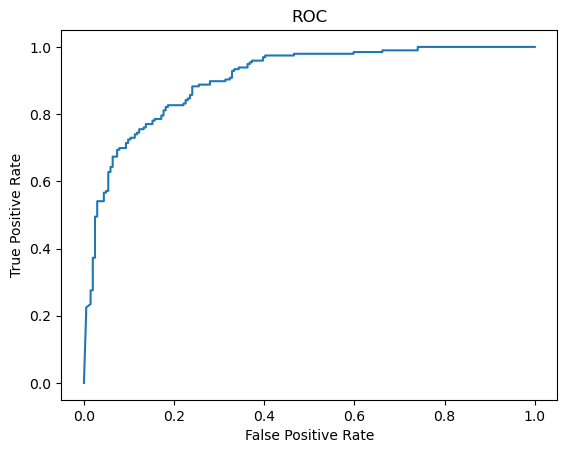

In [29]:
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)
plt.show()

In [34]:
# STEP 8: Now use external test1 dataset for predictions
# -------------------------------------------------------
# Make sure the column name is 'text'
X_test1_transformed = vect.transform(test1['text'])  # only transform, do not fit again

# Predict on external test data
y_test1_pred_class = bnb.predict(X_test1_transformed)
y_test1_pred_proba = bnb.predict_proba(X_test1_transformed)
from sklearn import metrics

# Convert actual labels if needed
test1['class'] = test1['class'].map({'Pos': 1, 'Neg': 0})

# Create confusion matrix
confusion1 = metrics.confusion_matrix(test1['class'], y_test1_pred_class)
print("Confusion Matrix (external test1):\n", confusion1)

# Extract TN, FP, FN, TP
TN, FP, FN, TP = confusion1.ravel()

# Calculate performance metrics
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)

# Print metrics
print("Sensitivity (Recall for positives):", sensitivity)
print("Specificity (Recall for negatives):", specificity)
print("Precision:", precision)

# Optional: confirm with sklearn's precision_score
print("Precision (via sklearn):", metrics.precision_score(test1['class'], y_test1_pred_class))


# -------------------------------------------------------
# STEP 9 (Optional): Evaluate if test1 has labels
# -------------------------------------------------------
if 'class' in test1.columns:
    test1['class'] = test1['class'].map({'Pos': 1, 'Neg': 0})
    accuracy_test1 = metrics.accuracy_score(test1['class'], y_test1_pred_class)
    print("Accuracy on external test1:", accuracy_test1)
    print("Confusion Matrix on test1:\n", metrics.confusion_matrix(test1['class'], y_test1_pred_class))
    print("F1 Score on test1:", metrics.f1_score(test1['class'], y_test1_pred_class))


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py:390: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y_true contains NaN.

In [ ]:
X_test_tranformed =vect.transform(X_test)

In [ ]:
X_test_tranformed =vect.transform(X_test)

In [ ]:
from sklearn.naive_bayes import BernoulliNB

# instantiate bernoulli NB object
bnb = BernoulliNB()

# fit 
bnb.fit(X_test_tranformed,y_test)

# predict class
y_pred_class1 = bnb.predict(X_test_tranformed)

# predict probability
y_pred_proba1 =bnb.predict_proba(X_test_tranformed)

# accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)


In [ ]:
metrics.confusion_matrix(y_test, y_pred_class)

In [ ]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

In [ ]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

In [ ]:
specificity = TN / float(TN + FP)

print("specificity",specificity)

In [ ]:
precision = TP / float(TP + FP)

print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

In [ ]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

In [ ]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [ ]:
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)
plt.show()